# Simulating the EVLA in D-Configuration

## 1. Introduction

### 1.1 Overview of EVLA characteristics

The Expanded Very Large Array (EVLA) is a radio interferometer located in New Mexico. It has 27 parabolic antennas on railroad tracks along the East-West, North-South and North directions that can be arranged in different configurations. In this notebook we use the EVLA in its D-configuration, which is a compact arrangement of antennas with a maximum baseline of 1.03 km. We simulate the interferometer at 5 GHz (6cm), which is in the C Band (4-8 GHz). A summary of the properties of EVLA-D in the C band is given in the table below [3]:

| Description | Symbol  | Value |
| :---: | :---: | :---: |
| No. of Antennas | N | 27 |
| Diameter | d (m) | 25 |
| No. of Baselines | N (N-1)/2 | 351 |
| Maximum Baseline | B_max(km) | 1.03 |
| Minimum Baseline | B_min(km) | 0.035 |
| Field of View | $\theta_{1/2}$(arcmin)| 8.25  |
| Resolution/Synthesised Beamwidth | $\theta$(arcsec) | 12 |
| Largest Angular Scale C band| LAS (arcsec) | 240|
| System Equivalent Flux Density | SEFD(Jy) | 310 |
| RMS Confusion Level | $\sigma_c$(microJy/beam)| 2.3 |


We simulate the response to a field of view with the following source positions (J2000 coordinates) and flux densities, with source 1 at the center of the field of view:
 
| | RA  | DEC | Flux (Jy) |
| :---: | :---: | :---: | :---: |
| Source 1| 05 00 00 | +45 00 00 | 3.6 |
| Source 2 | 05 00 10 | +45 03 00 | 5.8 |

In [323]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [324]:
#define constants

c = 3*pow(10,8) #meters/second
lambda_obs = c / (5*pow(10,9)) #wavelength = c / freq
N_ant = 27
N_baselines = int(N_ant*(N_ant-1)/2)
d = 25 #meters
b_max = 1030 #meters

### 1.2 Station Coordinates and Configuration of the Array
The array positions for the VLA in D-configuration were obtained from the NRAO library [1]. The vector (Lx , Ly , Lz) describes a station location in nanoseconds (ns) and R is the radial distance (in meters) from the center of the array to the station position [2]. <br>

In [325]:
#Station Configuration Coordinates (in nanoseconds) with array center as the origin
#Lx (ns) Ly (ns) Lz (ns) R(m)
antennas = np.array(
[[76.69, 11.67, -108.36, 39.95],
[49.29, -123.87, -67.42, 44.79],
[96.46, -248.46, -136.94, 89.83],
[156.49, -407.06, -225.51, 147.19],
[228.83, -597.84, -331.98, 216.18],
[311.96, -817.22, -454.39, 295.51],
[405.70, -1064.49, -592.36, 384.93],
[509.53, -1338.54, -745.23, 484.02],
[623.12, -1638.19, -912.51, 592.39],

[151.26, 23.33, -218.44, 79.96],
[37.71, 135.65, -50.59, 44.85],
[73.37, 271.95, -103.23, 89.94],
[118.76, 445.77, -170.46, 147.44],
[173.02, 653.27, -250.51, 216.07],
[235.66, 893.16, -343.18, 295.42],
[305.29, 1163.76, -448.46, 384.93],
[381.68, 1463.33, -565.35, 484.02],
[465.79, 1790.89, -692.95, 592.38],

[2.24, 0.05, 1.71, 0.84],
[-100.24, -15.93, 152.45, 54.91],
[-174.91, -27.56, 262.39, 94.90],
[-249.59, -39.15, 372.31, 134.89],
[-361.68, -56.66, 537.09, 194.86],
[-495.22, -77.43, 733.79, 266.41],
[-645.82, -100.90, 955.52, 347.07],
[-812.58, -126.88, 1200.98, 436.37],
[-995.39, -155.53, 1469.71, 534.19]] )

In [326]:
#convert antenna coordinates to meters
Lx = antennas[0:27,0]*pow(10,-9) * c
Ly = antennas[0:27,1]*pow(10,-9) * c
Lz = antennas[0:27,2]*pow(10,-9) * c

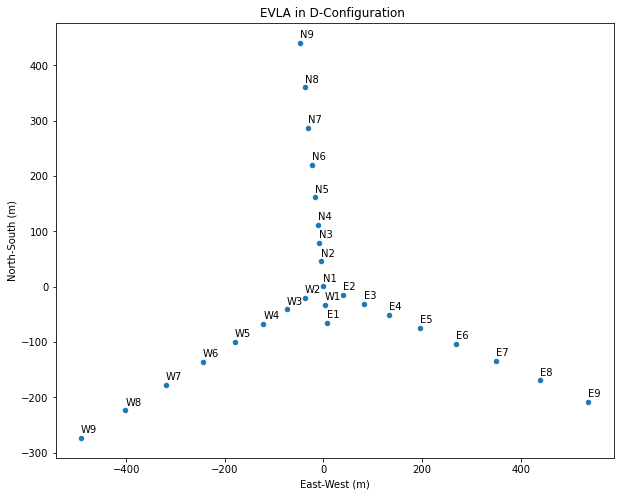

In [327]:
#plot the antenna coordinates
fig = plt.figure(figsize=(10,8))
plt.scatter(Ly,Lz,s=20)
plt.xlabel('East-West (m)')
plt.ylabel('North-South (m)')
plt.title('EVLA in D-Configuration ')

labels = ['W1','W2','W3','W4','W5','W6','W7','W8','W9','E1','E2','E3','E4','E5','E6','E7','E8','E9','N1','N2','N3','N4','N5','N6','N7','N8','N9']
for xa,ya,r in zip(Ly,Lz,range(27)):
    plt.annotate(labels[r],
                 (xa,ya),
                 textcoords="offset pixels",
                 xytext=(0,5),
                 ha='left')

## 2. Calculation of u,v,w coordinates

### 2.1 Source Positions
To convert source positions and hour angles from HMS to degrees, we can use the following: <br>
1 hour = 15 degrees <br>
1 min = 15/60 degrees <br>
1 sec = 15/3600 degrees <br>

In [328]:
# Source positions (in degrees) and Flux Densities(Jy)
RA_s1 = np.round(5*15,2)
DEC_s1 = np.round(45,2)
flux_s1 = 3.6
RA_s2 = np.round(5*15 +10*15/3600,2)
DEC_s2 = np.round(45 + 3/60 , 2)
flux_s2 = 5.8
print('Source 1 RA and DEC (in degrees):', RA_s1, DEC_s1)
print('Source 2 RA and DEC (in degrees):', RA_s2, DEC_s2)

Source 1 RA and DEC (in degrees): 75 45
Source 2 RA and DEC (in degrees): 75.04 45.05


### 2.2 Hour Angles of the Obervation
The observation is 1 hour long, between HA=+/-0.5, with data samples taken every 30 second. <br>
Therefore, the range of hour angles = -0.5 to +0.5 hrs = -7.5 to -+7.5 degrees <br>
Samples are taken every 30 seconds, so we calculate the number of samples for $\Delta$HA= 1 hr:<br>
1 hour/30 sec = 3600/30 = 120 samples <br>
To include the 0th hour, we will have to take 121 samples.

In [329]:
#hour angles
HA = np.linspace(-7.5,7.5,121)

### 2.3 The Baseline Vector <br>
The baseline vector depends on the relative positions of antenna elements and is independent of the origin of the reference frame. <br>

The baseline vector, denoted by (Bx , By , Bz ), is given by the relative difference between antenna positions for all the pairs of antennas:
$$ B_{jk} = L_k - L_j, $$
where j and k are station numbers and k > j [2]. <br>

In [330]:
#physical baselines
def baselines(Lx, Ly, Lz, N_ant):
    k=0
    N_baselines = int(N_ant*(N_ant-1)/2)
    baselines = np.zeros((N_baselines,3))
    for i in range(N_ant):
        for j in range(N_ant):
            if (i<j):
                baselines[k][0] = Lx[j] - Lx[i]
                baselines[k][1] = Ly[j] - Ly[i]
                baselines[k][2] = Lz[j] - Lz[i]
                k = k+1
    return baselines
baselines = baselines(Lx, Ly, Lz, N_ant)

### 2.4 u, v, w Coordinates
The VLA has two coordinate systems. In the earth-oriented topocentric system, $(x_e \  y_e \  z_e)$, the $z_e$ axis points to the North Pole and $y_e$ points to the East. The origin of the coordinate system is the center of the VLA wye. 
In the sky-oriented system, $(x_s\  y_s\  z_s)$, polar coordinates ($\theta$,$\phi$) are related to the DEC and HA. To convert from the earth-oriented to the sky-oriented system, we use the transformation matrix (equation 2-55) given in the NRAO VLA manual[2] and the earth-oriented coordinates of the baselines, and calculate the u, v, w coordinates:
$$
\begin{pmatrix} u_j \\ v_j \\ w_j \end{pmatrix} = 
\begin{pmatrix} \sin H & \cos H & 0\\ - \sin \delta  \cos H & \sin \delta  \sin H & \cos \delta \\ \cos \delta  \cos H & -\cos \delta  \sin H & \sin \delta \end{pmatrix}
\begin{pmatrix} B_{jx} \\ B_{jy} \\ B_{jz} \end{pmatrix}
$$
which gives:
$$ u_j = B_{jx} \sin H + B_{jy} \cos H  $$
$$ v_j = \sin \delta( - B_{jx} \cos H + B_{jy} \sin H ) + B_{jz} \cos \delta  $$
$$ w_j = \cos \delta( B_{jx} \cos H - B_{jy} \sin H ) + B_{jz} \sin \delta  $$

In the uvw coordinate system, w points towards the source. u and v are the East-West and North-South components of the projected baseline vectors repectively, and w is the delay in the arrival of a wavefront from ($\alpha$, $\delta$) at the jth antenna and at the center of the array. In radio interferometry u, v, and w are in the units of wavelength, therefore while calculating the values, we divide the results by the observing wavelength.

In [331]:
#args: baselines, hour angles of observation (in degrees) and declination of the center of the field of view (in degrees)
#returns: u, v, w, coordinates in units of wavelength
def uvw(baselines, HA, dec):
    #convert from degrees to radians
    HA = HA * np.pi / 180.
    dec = dec * np.pi/180.
    
    u,v,w = [], [], []
    for k in range(351):
        
        for ha in HA:
            u.append((baselines[k][0] * np.sin(ha) + baselines[k][1] * np.cos(ha))/lambda_obs)
            v.append((np.sin(dec) * (-baselines[k][0] * np.cos(ha) + baselines[k][1] * np.sin(ha)) + baselines[k][2] * np.cos(dec))/lambda_obs)
            w.append((np.cos(dec) * (baselines[k][0] * np.cos(ha) - baselines[k][1] * np.sin(ha)) + baselines[k][2] * np.sin(dec))/lambda_obs)
    
    return np.array(u),np.array(v),np.array(w)

u,v,w = uvw(baselines, HA, DEC_s1)

### 2.5 u-v Coverage

As the earth rotates, the projected baseline vectors change and the u, v coordinates trace out an ellipse. When the complex visibility function is calculated, we also get the conjugate visibilities, which would be equivalent to sampling points at (-u, -v), therefore both of these values are plotted in the u-v coverage shown.

Text(0.5, 1.0, 'u-v coverage')

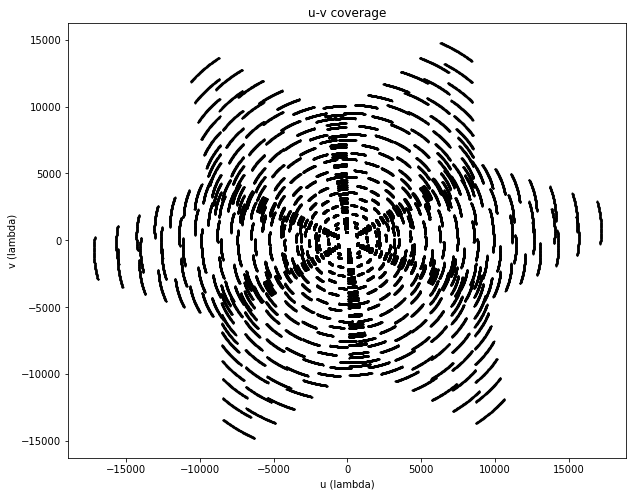

In [332]:
fig = plt.figure(figsize=(10,8))
plt.scatter(u, v,s=1, color='black')
plt.scatter(-u, -v,s=1, color='black')
plt.xlabel('u (lambda)')
plt.ylabel('v (lambda)')
plt.title('u-v coverage')

### 2.6 Direction Cosines
The direction cosines give the angular positions of the sources in the field of view, which is in a plane tangent to the celestial sphere. We can calculate the direction cosines with respect to the center of the field of view using the transformation matrix (equation 2-60) given in the NRAO VLA manual [2]. The unit vector $s_o$ points to the center of the field of view and the unit vector $s$ points to a general position in the field of view. 

$$ s - s_o = \begin{pmatrix} l \\ m \\ n \end{pmatrix} = 
\begin{pmatrix} cos \delta \sin (\alpha - \alpha_o) \\ -\sin\delta_o \cos \delta \cos (\alpha - \alpha_o) + \cos \delta_o \sin \delta \\ \cos\delta_o \cos \delta \cos (\alpha - \alpha_o) + \sin \delta_o \sin \delta - 1\end{pmatrix} 
$$
<br>
$l = m = n = 0$ for Source 1 because it is at the center of the field of view.


In [333]:
# l and m direction cosines for source 2 in radians
l = np.cos(DEC_s2*np.pi/180) * np.sin((RA_s2-RA_s1)*np.pi/180)
m = -np.sin(DEC_s1*np.pi/180) * np.cos(DEC_s2*np.pi/180) * np.cos((RA_s2-RA_s1)*np.pi/180) + np.cos(DEC_s1*np.pi/180) * np.sin(DEC_s2*np.pi/180)
#print(l,m)

#source positions in the FOV in arcmins
sources = np.round(60*np.array(([0,0],[l*180/np.pi,m*180/np.pi])),2)
print("l and m direction cosines of the sources in arcmin:\n",sources)

l and m direction cosines of the sources in arcmin:
 [[0.  0. ]
 [1.7 3. ]]


## 3.Calculation of Visibilities

### 3.1 Primary Beam

The field of view of an interferometer is given by the half-power beam width of antennas in the array:
$$ \theta_{HPBW} = \lambda / d $$ 
The primary beam of an antenna defines the sensitivity of the telescope beam across the field of view and it can be approximated by Gaussian. The HPBW and the standard deviation of the Gaussian are related as follows [4]:
$$ \sigma = \frac{HPBW}{ 2\sqrt{2\ln2}} $$

In [334]:
hpbw = round((lambda_obs/d)*180*60/np.pi,2) #size of the field of view
print("Half-Power Beam Width (arcmin):", hpbw)

Half-Power Beam Width (arcmin): 8.25


#### Map of the Primary Beam
In order to recover a signal from the sampled spatial frequencies, we need to sample at a rate greater than or equal to twice the maximum spatial frequencies (maximum u and maximum v) to satifsy the Nyquist sampling condition. This implies that in the l-m plane we need to take samples at 1/2umax in the l direction and 1/2vmax in the m direction [2]. We choose a sampling rate of 3.

We calculate the pixel size as follows:
$$\Delta l = \frac{1}{3 u_{max}}$$

$$\Delta m = \frac{1}{3 v_{max}}$$
We can then calculate the image size for a given field of view:
$$ N_l = \frac{\theta_{1/2}}{\Delta l} $$

$$ N_m = \frac{\theta_{1/2}}{\Delta m}$$

The subsequent calculations will involve using the FFT algorithm, which is more efficient when the image dimensions are powers of two.

In [335]:
#pixel size in the l,m plane in arcmins:
delta_l = 1*180*60/(3*max(abs(u))*np.pi)
delta_m = 1*180*60/(3*max(abs(v))*np.pi)

#image size
N_l = hpbw/(delta_l)
N_m = hpbw/(delta_m)

print('Pixel Size(arcmin):', delta_l,delta_m)
print('Image Size:',N_l,N_m)

Pixel Size(arcmin): 0.06676492656466783 0.07753161086201188
Image Size: 123.5678735003046 106.40821089972023


In [336]:
#find the nearest power of two
if N_l > N_m:
    N = int(pow(2, np.ceil(np.log(N_l)/np.log(2))));
else:
    N = int(pow(2, np.ceil(np.log(N_m)/np.log(2))));
print("N:", N)

N: 128


Pixel Size(arcmin): 0.064453125
Image Size: 128 x 128
This represents a field of view of
size: 8.25 x 8.25 arcmins


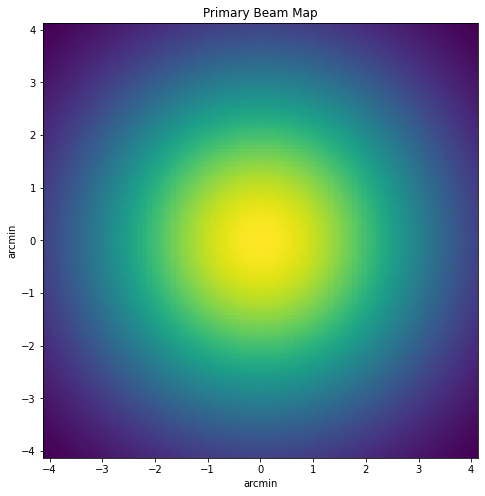

In [337]:
#calculate the primary beam given the image size and HPBW
def primary_beam(pixel, hpbw):
    x_ = np.linspace(-hpbw/2,hpbw/2,pixel)
    y_ = np.linspace(-hpbw/2,hpbw/2,pixel)
    xx,yy = np.meshgrid(x_,y_)
    z_ = np.hypot(xx,yy)
    stddev = hpbw/(2*np.sqrt(2*np.log(2)))
    gauss_img = np.exp(-z_*z_/(stddev*stddev))

    fig = plt.figure(figsize=(8,8))
    plt.xlabel('arcmin')
    plt.ylabel('arcmin')
    plt.title('Primary Beam Map')
    plt.imshow(gauss_img, origin='lower',extent=[-hpbw/2 , hpbw/2, -hpbw/2 , hpbw/2])
    return gauss_img

primary_beam = primary_beam(N, hpbw)
print('Pixel Size(arcmin):', hpbw/N)
print('Image Size:',N,'x', N)
print("This represents a field of view of")
print('size:',hpbw,'x',hpbw, 'arcmins')

### 3.2 The Model Sky

In [338]:
#calculate the model sky, given the image size, HPBW and l, m direction cosines of the two sources.
def model_sky(N, hbpw, sources):
    
    xx_ = np.zeros((N , N)).astype(float)
    int_src =(sources*N/hpbw).astype(int)
    
    #positions in FOV
    ra_s1 = int(N/2)+int_src[0][0]
    dec_s1 = int(N/2)+int_src[0][1]
    ra_s2 = int(N/2)+int_src[1][0]
    dec_s2 = int(N/2)+int_src[1][1]
    pos = np.array([[ra_s1, dec_s1],[ra_s2,dec_s2]])

    #set the source flux densities
    xx_[ra_s1, dec_s1]=flux_s1
    xx_[ra_s2,dec_s2]=flux_s2
    
    #fig = plt.figure(figsize=(8,8))
    #plt.imshow(xx_,extent=[-hpbw/2, hpbw/2, -hpbw/2, hpbw/2], origin='lower')
    return pos, xx_
    
pos, model_sky = model_sky(N, hpbw, sources)

### 3.3 The Field of View
The primary beam alters the flux densities of the sources in the model sky. We can multiply the model sky with the primary beam to see how the sources would appear in the field of view.

Measured positions (l m) and flux densities in the FOV:
Source 1 0.0 0.0 3.6
Source 2 1.7 3.0 2.17


Text(0.5, 1.0, 'Sources in the Field of View')

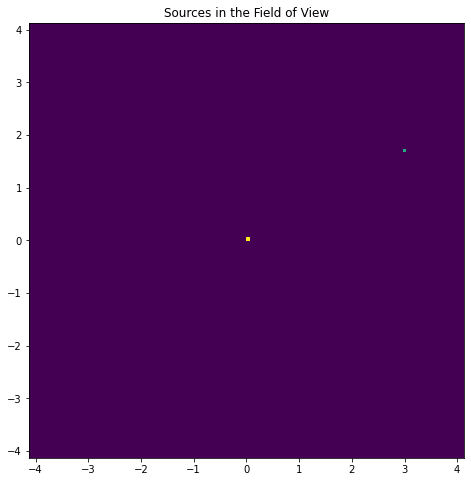

In [339]:
sky = model_sky * primary_beam

fluxs1 = np.round(sky[pos[0][0],pos[0][1]],2)
fluxs2 = np.round(sky[pos[1][0],pos[1][1]],2)
print("Measured positions (l m) and flux densities in the FOV:")
print("Source 1",sources[0][0],sources[0][1],fluxs1)
print("Source 2",sources[1][0],sources[1][1],fluxs2)

plt.figure(figsize=(8,8))
plt.imshow(sky, origin='lower',extent=[-hpbw/2, hpbw/2, -hpbw/2, hpbw/2])
plt.title("Sources in the Field of View")

### 3.4 Complex Visibilities
Fourier transform of the sky brightness distribution gives the complex visibilities [5]:
$$ V(u,v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} I(l,m) e^{-2\pi i(ul+vm)} \,dl dm $$

In [340]:
#The visibility funtion is the Fourier transform of the sky brightness distribution:
fft_sky = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(fov)))

## 4. Calculation of the Dirty Map

### 4.1 UV Sampling and the Synthesised Beam
In reality, we do not meaure all the complex visibilities. The complex visibility function is sampled in the u-v plane by the u-v coverage. <br>
The sampling function is calculated by setting the real part of the uv plane to 1 where it has been sampled and setting it to 0 otherwise [6]. <br>
The Fourier transform of the sampling function gives the point spread function which is also known as the synthesised beam or the dirty beam [5].

$$ B(l,m) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} S(u,v) e^{2\pi i(ul+vm)} \,du \  dv $$

In [341]:
def uv_sampling(u,v,pixel):
    uv_samples = np.zeros((pixel,pixel)).astype(complex)
    delta_u =(3*np.max((u))/pixel)
    delta_v =(3*np.max((v))/pixel)
   
    for i in range(len(u)):
        u_ = (u[i]/delta_u) + pixel/2
        v_ = (v[i]/delta_v) + pixel/2
        rounded_u = (np.round(u_)).astype(int)
        rounded_v = (np.round(v_)).astype(int)
        
        uv_samples[rounded_u,rounded_v]+= 1 +0j
        uv_samples[-rounded_u,-rounded_v]+= 1 +0j
     
    return uv_samples

uv_samples = uv_sampling(u, v, N)

Image Size: 128 128
Synthesised Beamwidth (arcsec): 12.02


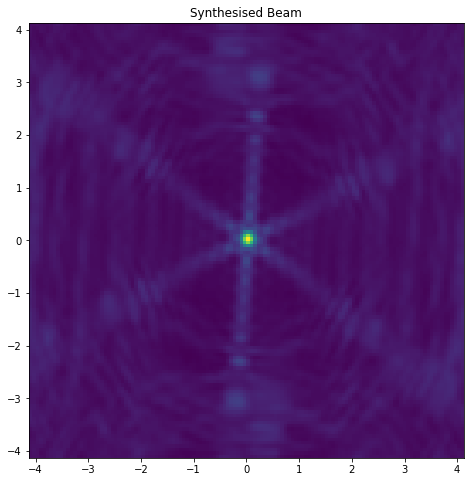

In [342]:
# Dirty Beam
dirty_beam=np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(uv_samples)))
plt.figure(figsize=(8,8))
plt.imshow(dirty_beam.real,origin='lower', extent=[-hpbw/2, hpbw/2, -hpbw/2, hpbw/2])
plt.title("Synthesised Beam")
print("Image Size:", N, N)
print("Synthesised Beamwidth (arcsec):", round(180*60*60/(max(u)*np.pi),2))

### 4.2 Sampled Visibilities and The Dirty Map
Fourier tranform of the sampled visibilities gives the dirty map:
$$ I^D(u,v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} V(u,v)S(u,v) e^{2\pi i(ul+vm)} \,du \  dv $$

Using the convolution theorem, we can write the fourier transform of the multiplication of two functions as the convolution of the fourier transform of the individual functions [5].


$$ I^D(l,m) = I(l,m) * B(l,m) $$

$I^D(l,m)$ is known as the Dirty Map.

In [343]:
sampled_vis = fft_sky * uv_samples

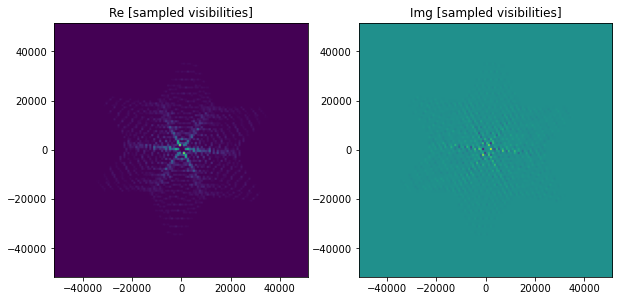

In [344]:
#Real and imaginary parts of the sampled visibilities

plt.figure(figsize=(10,10))
fig = plt.subplot((121))
plt.title("Re [sampled visibilities]")
plt.imshow(sampled_vis.real,origin='lower',extent=[-abs(max(u))*3, abs(max(u))*3, -abs(max(u))*3, abs(max(u))*3])
fig = plt.subplot((122))
plt.title("Img [sampled visibilities]")
plt.imshow(sampled_vis.imag,origin='lower',extent=[-abs(max(u))*3, abs(max(u))*3, -abs(max(u))*3, abs(max(u))*3])

Text(0.5, 1.0, 'Dirty Map')

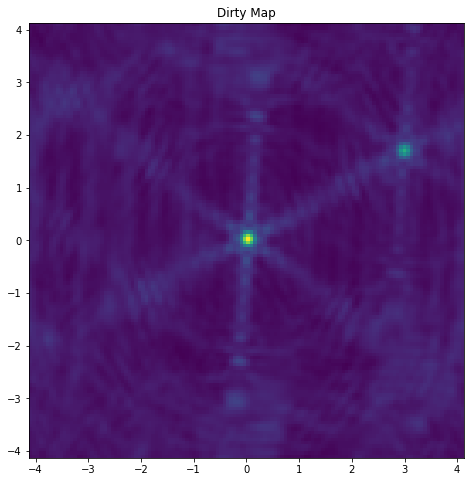

In [345]:
#Dirty map is the fourier transform of the sampled visibilities
dirty_map = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(sampled_vis)))
plt.figure(figsize=(8,8))
plt.imshow(dirty_map.real,origin='lower',extent=[-hpbw/2, hpbw/2, -hpbw/2, hpbw/2])
plt.title("Dirty Map")

## 5. Conclusion
In this notebook, the response of a radio interferometer, the EVLA in its D-configuration, was simulated to a field of view containing two sources. By comparing the the dirty map with the dirty beam and model sky, we can see that the resulting image is the convolution of the two.

## References
[1] https://science.nrao.edu/facilities/vla/docs/manuals/oss2016A/ant_positions.pdf <br>
[2] An Introduction to the NRAO VLA: https://library.nrao.edu/public/memos/vla/misc/VLAU_20.pdf <br>
[3] Performance of VLA https://science.nrao.edu/facilities/vla/docs/manuals/oss2013B/performance/referencemanual-all-pages <br>
[4] CASA Imaging Guide: https://casaguides.nrao.edu/index.php/VLA_CASA_Imaging-CASA5.4.0 <br>
[5] Richard Thompson, A., Moran, J.M. and Swenson Jr, G.W., 2017. Interferometry and synthesis in radio astronomy. Springer Nature. <br>
[6] https://web.njit.edu/~gary/728/Lecture6.html